# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

Objective:


This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.


Dataset:


Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


In [2]:
!pip install ppscore

In [8]:
!pip install numpy==1.26.4

In [10]:
pip install --upgrade --force-reinstall numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 24.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Exploration and Preprocessing:


•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).


•	Handle missing values as per the best practices (imputation, removal, etc.).

In [2]:
# Load dataset
df = pd.read_csv("adult_with_headers.csv")

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df.duplicated().sum()

np.int64(24)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
## In our dataset there is lot 0 than missing in capital gain and capital loss we need to do something for that
## First undestand the column which has lots of Zero (capital gain, capital loss)
''' capital_gain:
This is the amount of money a person gains from investment sources (like stocks, bonds, property, etc.) not salary,
 while capital_loss:
This is the amount of money a person lost from investments.

Most people in the dataset have capital_gain = 0 and capital_loss = 0
 we can't remove or replace with mean, median(simple imputer)
 A good consideration is Log Transform'''

" capital_gain:\nThis is the amount of money a person gains from investment sources (like stocks, bonds, property, etc.) not salary,\n while capital_loss:\nThis is the amount of money a person lost from investments.\n\nMost people in the dataset have capital_gain = 0 and capital_loss = 0\n we can't remove or replace with mean, median(simple imputer)\n A good consideration is Log Transform"

In [11]:
# Replace '0' with NaN and fill with mode (categorical) or median (numeric)
df = df.replace('0', np.nan)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [12]:
# log1p means log(1+x), it handles 0 values safely
df['capital_gain_log'] = np.log1p(df['capital_gain'])
df['capital_loss_log'] = np.log1p(df['capital_loss'])

# Show before and after (first 10 rows)
print(df[['capital_gain','capital_gain_log','capital_loss','capital_loss_log']].head(10))

   capital_gain  capital_gain_log  capital_loss  capital_loss_log
0          2174          7.684784             0               0.0
1             0          0.000000             0               0.0
2             0          0.000000             0               0.0
3             0          0.000000             0               0.0
4             0          0.000000             0               0.0
5             0          0.000000             0               0.0
6             0          0.000000             0               0.0
7             0          0.000000             0               0.0
8         14084          9.552866             0               0.0
9          5178          8.552367             0               0.0


In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_log,capital_loss_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.684784,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.000000,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000000,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.000000,0.0


In [14]:
df.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

In [15]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_gain_log,capital_loss_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,7.684784,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0.000000,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0.000000,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0.000000,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0.000000,0.0


•	Apply scaling techniques to numerical features:


•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.


In [16]:
# Scaling numeric columns
num_cols = ['age','fnlwgt','education_num','capital_gain_log','capital_loss_log','hours_per_week']
cat_cols = df.select_dtypes(include='object').columns

In [17]:
''' For tax calculation, Standard Scaling is generally a better choice than Min-Max Scaling because tax-related data typically contains outliers and is often skewed '''

' For tax calculation, Standard Scaling is generally a better choice than Min-Max Scaling because tax-related data typically contains outliers and is often skewed '

In [18]:
# Standard Scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_gain_log,capital_loss_log
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,-0.035664,United-States,<=50K,2.830199,-0.22116
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-2.222483,United-States,<=50K,-0.299391,-0.22116
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.035664,United-States,<=50K,-0.299391,-0.22116
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.035664,United-States,<=50K,-0.299391,-0.22116
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.035664,Cuba,<=50K,-0.299391,-0.22116


2. Encoding Techniques:


•	Apply One-Hot Encoding to categorical variables with less than 5 categories.


•	Use Label Encoding for categorical variables with more than 5 categories.


•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [20]:
# Encoding
one_hot_cols = [c for c in cat_cols if df[c].nunique() < 5] ## one_hot_cols: Columns with less than 5 unique categories → suitable for one-hot encoding.
label_cols   = [c for c in cat_cols if df[c].nunique() >= 5] ## label_cols: Columns with 5 or more unique categories → suitable for label encoding.

# Label Encoding
le = LabelEncoder()
for c in label_cols:
    df[c] = le.fit_transform(df[c]) ## transform

# One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols)

In [21]:
''' # Pros/Cons:
Label Encoding:
Pros:

Works well with high-cardinality(large categories available) categorical variables.
Keeps the dataset compact, avoids exploding the number of columns.

Cons:

Implies an ordinal relationship between categories (e.g., 0 < 1 < 2) which may not exist, potentially misleading some models (like linear regression).
Not ideal for tree-based models, though some (like XGBoost, LightGBM) handle label encoding better.

One-Hot encoding:
Pros:
No implicit order; perfect for nominal categorical variables.
Works well with linear models, logistic regression, neural networks.

Cons:

Can explode the number of columns if the category has many unique values → increases memory usage and model complexity.
Sparse matrices may be inefficient if many categories.'''

' # Pros/Cons:\nLabel Encoding:\nPros:\n\nWorks well with high-cardinality(large categories available) categorical variables.\nKeeps the dataset compact, avoids exploding the number of columns.\n\nCons:\n\nImplies an ordinal relationship between categories (e.g., 0 < 1 < 2) which may not exist, potentially misleading some models (like linear regression).\nNot ideal for tree-based models, though some (like XGBoost, LightGBM) handle label encoding better.\n\nOne-Hot encoding:\nPros:\nNo implicit order; perfect for nominal categorical variables.\nWorks well with linear models, logistic regression, neural networks.\n\nCons:\n\nCan explode the number of columns if the category has many unique values → increases memory usage and model complexity.\nSparse matrices may be inefficient if many categories.'

In [22]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,capital_gain_log,capital_loss_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,-0.035664,39,2.830199,-0.22116,False,True,True,False
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-2.222483,39,-0.299391,-0.22116,False,True,True,False
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.035664,39,-0.299391,-0.22116,False,True,True,False
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.035664,39,-0.299391,-0.22116,False,True,True,False
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.035664,5,-0.299391,-0.22116,True,False,True,False


3. Feature Engineering:


•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.


•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [23]:
#  Feature Engineering
df['capital_net'] = df['capital_gain_log'] - df['capital_loss_log'] #already we transformed these into log transformation getting net column from these 2 columns
df['high_education'] = (df['education_num'] >= 13).astype(int) # we getting a new column which is the high_education which who has more than 13


In [24]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,capital_gain_log,capital_loss_log,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_net,high_education
0,0.030390,7,-1.063569,9,1.134777,4,1,1,4,-0.035664,39,2.830199,-0.22116,False,True,True,False,3.051359,0
1,0.836973,6,-1.008668,9,1.134777,2,4,0,4,-2.222483,39,-0.299391,-0.22116,False,True,True,False,-0.078231,0
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,4,-0.035664,39,-0.299391,-0.22116,False,True,True,False,-0.078231,0
3,1.056950,4,0.425752,1,-1.198407,2,6,0,2,-0.035664,39,-0.299391,-0.22116,False,True,True,False,-0.078231,0
4,-0.776193,4,1.408066,9,1.134777,2,10,5,2,-0.035664,5,-0.299391,-0.22116,True,False,True,False,-0.078231,0


<Axes: >

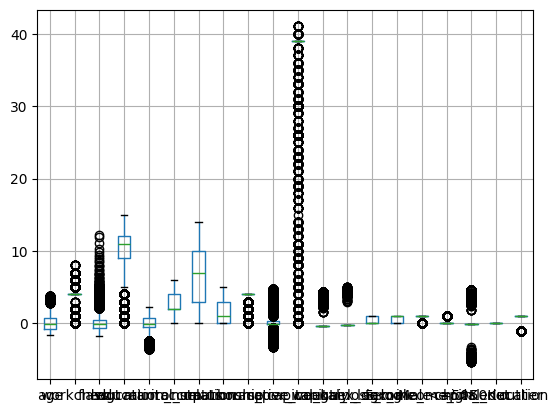

In [35]:
df.boxplot()

4. Feature Selection:


•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.


•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [26]:

# Isolation Forest → detect outliers
iso = IsolationForest(contamination=0.01, random_state=42) ## IsolationForest is an unsupervised algorithm used to detect anomalies/outliers in your dataset.
                                                          ##contamination=0.01 specifies the expected proportion of outliers in the data (1% in this case).
df['outlier'] = iso.fit_predict(df[num_cols])

In [27]:
print("\nOutliers detected:", (df['outlier']==-1).sum())  ## df['outlier']==-1 creates a boolean series True if the row is an outlier /False if normal

# Remove outliers
df_clean = df[df['outlier']==1]


Outliers detected: 326


In [28]:
''' Capital Gains / Losses: Some individuals may have extremely high gains or losses.
Income: CEOs or high-net-worth individuals may have very large incomes compared to the median.
Hours Worked / Deductions: Rare cases with extreme values

Outliers in features like capital_gain or capital_loss can inflate their MI score, making them seem more predictive than they are for typical taxpayers.
Log-transform capital_gain and capital_loss to reduce skew.'''

' Capital Gains / Losses: Some individuals may have extremely high gains or losses.\nIncome: CEOs or high-net-worth individuals may have very large incomes compared to the median.\nHours Worked / Deductions: Rare cases with extreme values\n\nOutliers in features like capital_gain or capital_loss can inflate their MI score, making them seem more predictive than they are for typical taxpayers.\nLog-transform capital_gain and capital_loss to reduce skew.'

In [29]:
#list column names in Df_clean
df_clean.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race',
       'hours_per_week', 'native_country', 'capital_gain_log',
       'capital_loss_log', 'sex_ Female', 'sex_ Male', 'income_ <=50K',
       'income_ >50K', 'capital_net', 'high_education', 'outlier'],
      dtype='object')

In [30]:
# PPS Proxy → use Mutual Information
X = df_clean.drop('income_ >50K', axis=1, errors='ignore') #check column with name income_ >50K if No means ignore
y = (df_clean['income_ >50K']=='>50K').astype(int)  # convert target into (>50K/<50K)=0/1

mi = mutual_info_classif(X, y) #Mutual Information measures how much knowing the value of a feature reduces uncertainty about the target.
## Higher MI → the feature is more informative/predictive.
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False) ### Converts the array of MI scores into a pandas Series with feature names as the index.
## sort_values(ascending=False) sorts the features from most informative to least informative.
print("\nTop features by Predictive Power (Mutual Info):\n", mi_scores.head(10))


Top features by Predictive Power (Mutual Info):
 outlier             0.007948
income_ <=50K       0.007389
race                0.007203
native_country      0.006892
sex_ Male           0.006287
workclass           0.003632
marital_status      0.002530
sex_ Female         0.002437
capital_gain_log    0.002080
education           0.001428
dtype: float64


In [31]:
print("\nFinal cleaned dataset shape:", df_clean.shape)


Final cleaned dataset shape: (32211, 20)


In [32]:
import ppscore as pps

In [33]:
target = 'income_ >50K'

# Ensure target exists
if target not in df_clean.columns:
    print("Error: Target column not found!")
else:
    # Convert target to categorical if needed
    df_clean[target] = df_clean[target].astype('category')

    # Compute PPS: feature → target
    pps_target = pps.predictors(df_clean, target)  # target as positional argument

    # Sort by predictive power
    pps_target = pps_target.sort_values(by='ppscore', ascending=False)

    # Display top 10 predictive features
    print("Top 10 features by PPS:")
    print(pps_target[['x', 'ppscore']].head(10))

/tmp/ipython-input-1648298066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[target] = df_clean[target].astype('category')


Top 10 features by PPS:
                  x   ppscore
0     income_ <=50K  1.000000
1       capital_net  0.367072
2  capital_gain_log  0.280912
3         education  0.222408
4     education_num  0.222408
5  capital_loss_log  0.117613
6         workclass  0.092354
7    hours_per_week  0.016871
8      relationship  0.016806
9    native_country  0.012420


                       age    fnlwgt  education_num  capital_gain_log  \
age               1.000000 -0.076447       0.036224          0.124170   
fnlwgt           -0.076447  1.000000      -0.043388         -0.004423   
education_num     0.036224 -0.043388       1.000000          0.129109   
capital_gain_log  0.124170 -0.004423       0.129109          1.000000   
capital_loss_log  0.051414 -0.009130       0.077108         -0.066213   
hours_per_week    0.068515 -0.018898       0.148422          0.083788   

                  capital_loss_log  hours_per_week  
age                       0.051414        0.068515  
fnlwgt                   -0.009130       -0.018898  
education_num             0.077108        0.148422  
capital_gain_log         -0.066213        0.083788  
capital_loss_log          1.000000        0.051258  
hours_per_week            0.051258        1.000000  


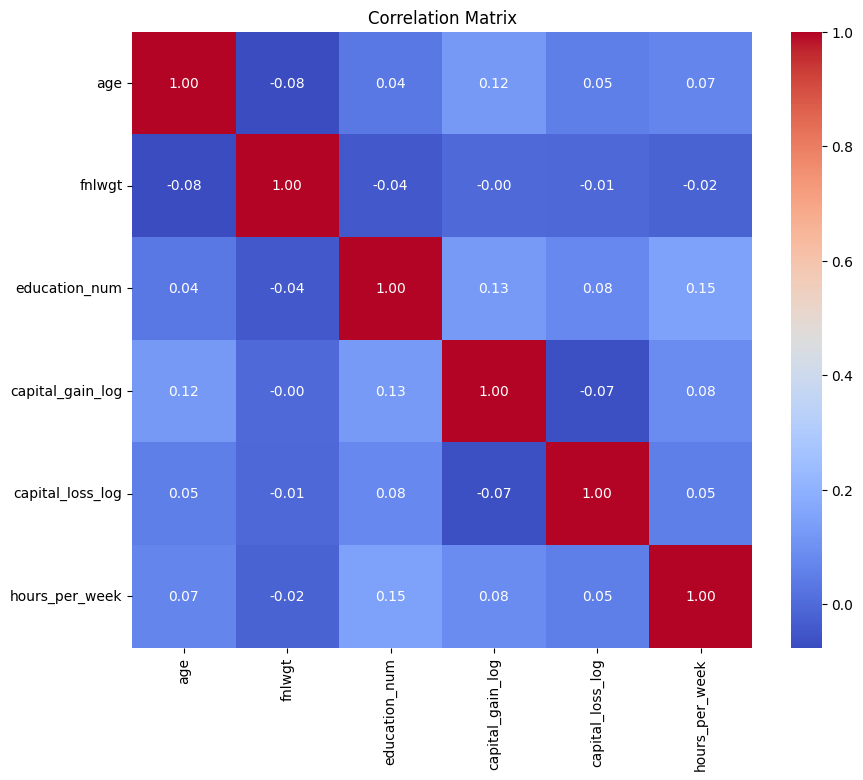

In [34]:
corr_matrix = df[num_cols].corr()

# Display correlation matrix as table
print(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()